# Airfoil Data

In [33]:
import os
import sys
projdir = os.path.abspath('../..')
if not projdir in sys.path:
    sys.path.insert(0,projdir)

Finding airfoil data for the flight range of our indoor models is difficult. However, recent interest in micro flying vehicles has generated some data. Still, my attempts at matching a typical indoor model with experimental airfoil data only turned up a few possible data sources. 

In my past, I conducted some serious computer based studies of the flow of air over high speed vehicles as part of my research work in both graduate school and in the Air Force. In developing new computer tools for this kind of work, we always looked for actual experimental data that could be used to validate our new tools. 

For this project, I decided to try out the freely available *XFoil* program, and compare results from this program and data I found online.  

## XFoil Testing

*XFoil* is a popular tool often used in the study of low speed airfoils.  The program has been around along time. It was originally developed by MIT Professor Mark Drela as part of his *Daedalus* {cite}`drela` project which resulted in a man powered airplane that flew 72.4 miles from Crete to the Greek island of Santorini in 1988! Mark often used model airplanes in how aerodynamics classes.

The only problem with *XFoil* is that is was written in Fortran, a language that is not that popular today. Fortunately there is a nice free Fortran compiler available today called *gfortran** which can handle this program. I managed to compile the latest version of the *XFoil* on both my Mac and Linux laptops, (I will get it running on WIndows as soon as I can!)

*XFoil* is a command line program, making it a bit clumsy to run in today's mouse driven world. Many folks who use *XFoil* hide the old-fashioned interface behind something more modern, like a Python front end!

I will explore some of those tools in a later study. For now, I set up a simple Python front end that drives *XFoil* as needed to generate aerodynamic data we can use in this current study. I will not cover that code here. Instead, we will look at the final product, the aerodynamic data needed for the Wart-A6!

### Test Airfoils

The Wart uses a simplex airfoil. I was not able to find usable data for that airfoil, but i did find some suitable data for another common indoor airfoil, the simple circular arc.

To test both of these airfoils, I wrote a routine that produces a thin airfoil at the specified camber height and a specified thickness. *XFoil* is not really happy working with super thin airfoils like we use on indoor models, so I settled on a one percent thick airfoil with a round leading edge, and a parabolic taper on the trailing edge.

All airfoils are stored in a directory with the airfoil name, and s subdirectory identifying the Reynolds Number. The **AirfoilMgr** module manages access:

In [34]:
from mmtime.AirfoilMgr import AirfoilMgr
am = AirfoilMgr()

We can check to see what airfoils are available:

In [35]:
am.showAirfoils()

['mcbride-b7', 'arc0401', 'arc5', 'arc3', 'BEZ0625018506', 'arc0301', 'ARC0601', 'arc0201', 'flat0001', 'ARC0501']


Next, we select the airfoil by name from this list, then load coefficient data for the Reynolds Number.

TODO: the directory should show Reynolds Numbers available

In [36]:
import numpy as np
am.selectAirfoil('arc3')
x = np.linspace(-5,10,50)
cl, cm, cd, cp = am.loadData('re3k')

Selected: arc3
Loading arc3
	Loading CL-re3k.csv
	Loading CM-re3k.csv
	Loading CD-re3k.csv
	Loading CP-re3k.csv


The coefficients returned are Python functions. You provide an angle of attack (in degrees) and the functions will return the coefficient. We can plot these curves esily using **matplotlib**:

In [37]:
import matplotlib.pyplot as plt
import math

In [38]:
x = np.linspace(-5,10,50)
CL = cl(x)
CD = cd(x)

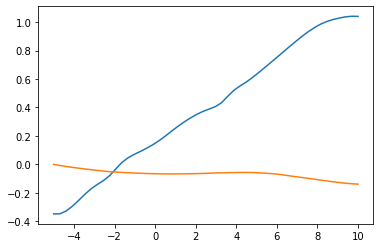

In [39]:
plt.plot(x, CL)
plt.plot(x,CD)
plt.show()

Let's try a lift-drag polar plot:

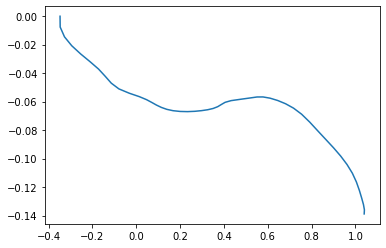

In [40]:
plt.plot(CL,CD)
plt.show()

## Xfoil Data

As a check of how well *Xfoil* does with this airfoil, I used my simple circular arc airfoil and ran a test for the same Reynolds Number:

In [41]:
am.selectAirfoil('arc0301')
cl2, cm2, cd2, cp2 = am.loadData('re3k')

Selected: arc0301
Loading arc0301
	Loading CD_re3k.csv
	Loading CP_re3k.csv
	Loading CM_re3k.csv
	Loading CL_re3k.csv


In [42]:
CL2 = cl2(x)
CD2 = cd2(x)

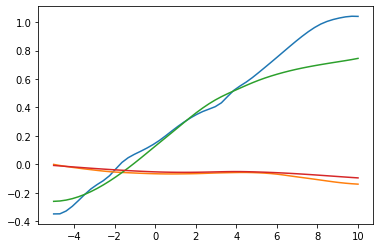

In [43]:
plt.plot(x,CL)
plt.plot(x,CD)
plt.plot(x,CL2)
plt.plot(x,CD2)
plt.show()

Obviously, *Xfoil* is not perfect, but it is a reasonable tool for initial design analysis The agreement between experimental data and *XFoil* is reasonable between angles of attack ranging from $-2$ to $5$ degrees, but not so good outside that range. For the moment, I will use *XFoil* data for the rest of this analysis. *XFoil generates pressure distributions, and aerodynamic coefficients which are very useful in further work. It may not be able to handle all input conditions, but so far, I am getting reasonable data for the airfoils needed for this initial study.

I have created Python routines to generate both circular arc and simplex airfoils with specified camber values.  

## Lift and Drag Calculations

## Profile Drag

The drag produced by skin friction and the pressure distribution around the airfoil is called *Profile Drag*. **xfoil** returns the pressure drag coefficient $ C_{dp}$, and can deliver the pressure distribution as well. 

## Downwash Calculations

The production of lift creates a downwash in the air behind a lifting surface. This downwash contributes to an increase in drag. Furthermore, the downwash produced by the wing affects the flow over the stabilizer. From McLean's paper, we can use two simple equations include these effects in our drag calculations.  

The induced drag coefficients for the wing and stab are given by:

\begin{equation}
C_{di,w} = \frac{{C_l}_w^2}{\pi A_w} 
\end{equation}

\begin{equation}
C_{di,t} = \frac{{{C_l}_t}^2}{\pi A_t} + \frac{ 2 {C_l}_w}{\pi A_w} 
\end{equation}

The aspect ration is calculated from the surface span and area:

\begin{equation}
AR = b^2/S
\end{equation}

Where **b** is the surface span, and **S** is the surface area.

We will use these equations when we calculate drag later in this study.

In [45]:
def epsilon(alpha):
    CL = cl2(alpha)
    print(CL)
    ARw = 15.03**2/30.0
    eps = 2 * CL /(math.pi * ARw)

In [46]:
epsilon(5)

0.5853836829836869
